In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Resume.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.sample(10)

,Category,Resume
79,HR,Education Details \r\n MBA ACN College of en...
648,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...
788,ETL Developer,Computer skills: - Yes. SQL knowledge-yes Unix...
75,HR,Education Details \r\n BA mumbai University\...
329,Java Developer,Education Details \r\nJanuary 2016 B.E Informa...
355,Java Developer,"Operating Systems Windows XP, 7, 10. Tools/Pac..."
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
727,Database,Software Skills: * RDBMS: MS SQL SERVER 2000/2...
171,Web Designing,Education Details \r\n B.C.A Bachelor Computer...
761,Hadoop,"Technical Skills Programming Languages: C, C++..."


In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
df.sample(5)

,Category,Resume
36,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
38,Data Science,Personal Skills â¢ Ability to quickly grasp t...
702,PMO,Skills Exceptional communication and networkin...
507,Electrical Engineering,Education Details \r\n\r\nElectrical engineeri...
614,DevOps Engineer,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...


In [7]:
df.shape

(962, 2)

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [10]:
# Data Visualization

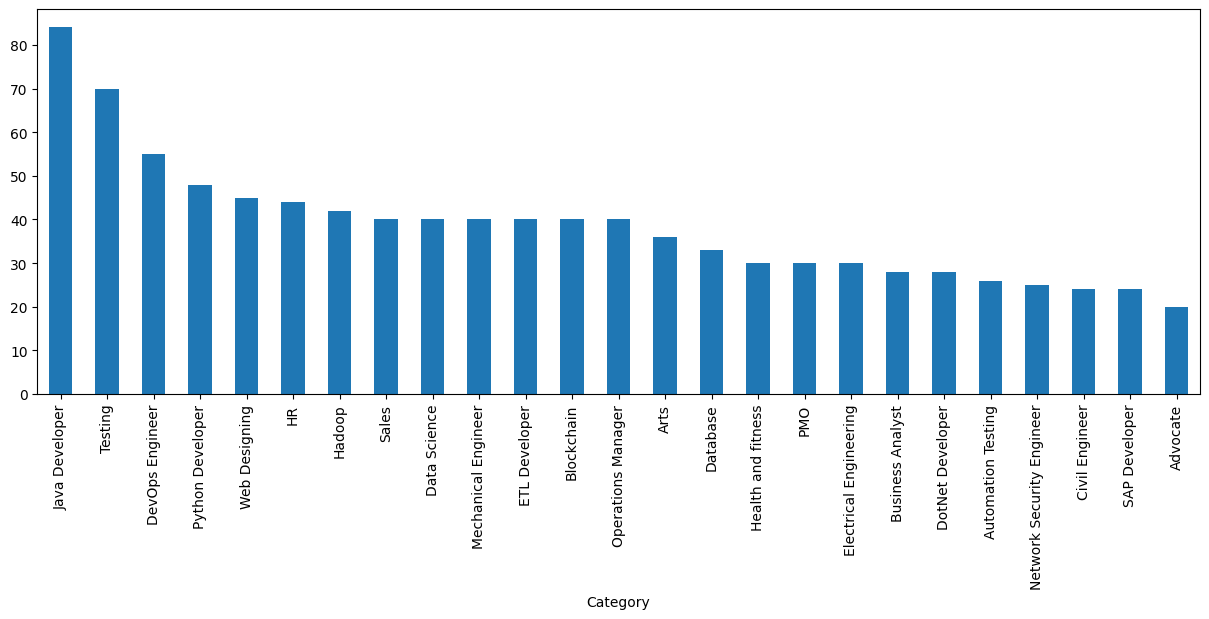

In [11]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

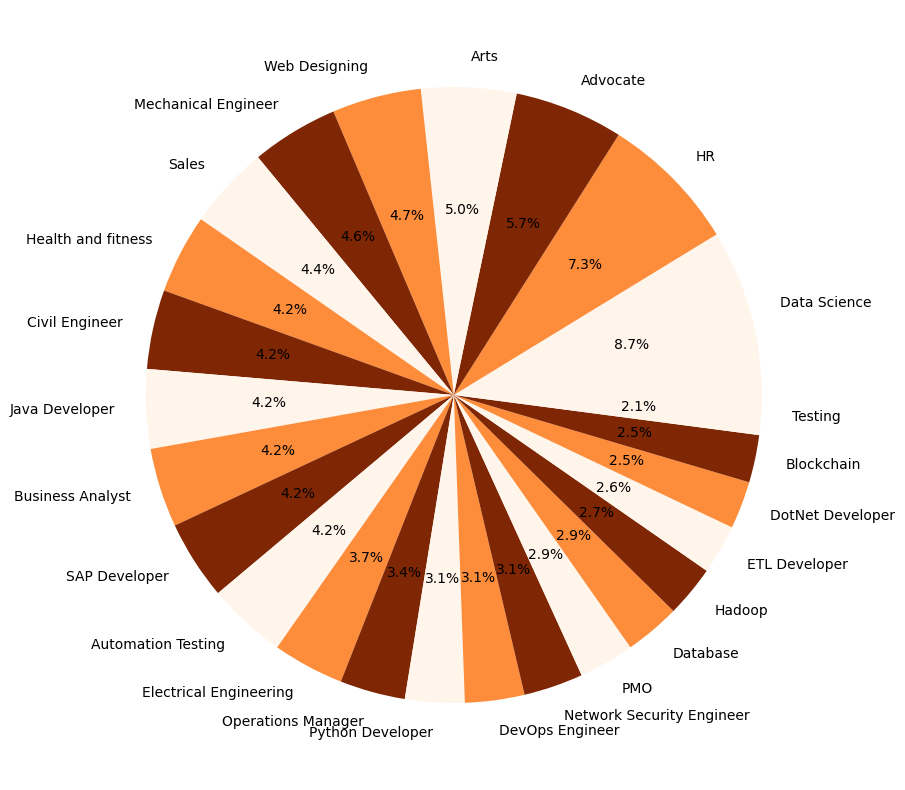

In [12]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [13]:
# Text cleaning using NLP
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [14]:
# Remove URL
# Remove Emails
# Remove Special Character
# Remove stop words

In [15]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text
    

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Vivek\AppData\Local\Temp\ipykernel_24440\877866067.py:7: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [16]:
s = 'Hello, $%& I found this # article at https://www.vivek.com ! You can contact me at chando@example.com'

In [17]:
clean(s)

'Hello found article contact'

In [18]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [19]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [20]:
# Encoding

In [21]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [23]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [24]:
df.sample(10)

,Category,Resume
351,15,Education Details January 2013 Master Engineer...
676,17,Communication Skills writing skills English go...
463,2,Technical Skills Summary completed CORPORATE T...
464,2,SKILLS Agile Methodology Scrum Kanban Extreme ...
576,20,Education Details June 2013 June 2016 Diploma ...
825,9,Participated intra college cricket competition...
5,6,SKILLS C Basics IOT Python MATLAB Data Science...
605,8,TECHNICAL SKILLS â HP ALM RTC JIRA â AS400 iSe...
238,22,Skills MS Office Photoshop SQL ServerEducation...
217,16,Education Details January 2018 Bachelors Engin...


In [25]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [26]:
X_train.shape

(769, 8017)

In [27]:
y_train.shape

(769,)

In [28]:
X_test.shape

(193, 8017)

In [29]:
y_test.shape

(193,)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.9844559585492227


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [32]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier())
}

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store metrics for each model
metrics_scores = {}

# Iterate through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Using 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the metrics in the dictionary
    metrics_scores[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Print the summary of metrics for all models
print("\nSummary of Metrics for All Models:")
for model_name, scores in metrics_scores.items():
    print(f"\n{model_name}:")
    for metric, score in scores.items():
        print(f"  {metric}: {score:.4f}")



Summary of Metrics for All Models:

KNeighborsClassifier:
  Accuracy: 0.9845
  Precision: 0.9874
  Recall: 0.9845
  F1-Score: 0.9839

LogisticRegression:
  Accuracy: 0.9948
  Precision: 0.9955
  Recall: 0.9948
  F1-Score: 0.9949

RandomForestClassifier:
  Accuracy: 0.9845
  Precision: 0.9866
  Recall: 0.9845
  F1-Score: 0.9823

SVC:
  Accuracy: 0.9948
  Precision: 0.9951
  Recall: 0.9948
  F1-Score: 0.9948

MultinomialNB:
  Accuracy: 0.9793
  Precision: 0.9836
  Recall: 0.9793
  F1-Score: 0.9775

OneVsRestClassifier:
  Accuracy: 0.9845
  Precision: 0.9874
  Recall: 0.9845
  F1-Score: 0.9839


In [92]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
myresume = """Education Details 
May 2011 to May 2014 Bachelor of science Information technology Mumbai, Maharashtra Mumbai university
Oracle DBA 

Oracle database administrator
Skill Details 
Installation of Oracle on RH Linux & Windows. Creating/Managing user profiles and analyzing their privileges and tablespace quotas Backup of database Logical and Physical procedures. Recovery of database in case of database crash, disk/media failure, etc. Standard DBA functions like space management, Rollback segments, Extents. Database Management and Monitoring the database. Willing to learn new things. Being a constructive team member, contributing practically to the success of the team.- Exprience - 48 monthsCompany Details 
company - Accelya kale solutions ltd
description - Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Database Up-gradation from Oracle 11g to Oracle 12c.
Installation of Database critical patches.
Taking cold and hot backups on scheduled times and monitoring backups.
Importing the export dump to another database as per demands.
Automating most of the daily activities through cronjobs, shell scripts or schedulers.
Making Plan of Actions for Various Activities.
Raising SR with Oracle Support for different severity issues.
Handling the Userâs request and proper client interaction.
Monitoring & managing database growth, tablespaces, adding ,resizing and renaming the datafiles.
Restoration of database using RMAN backups for backup consistency checks.
Migration of Database using export / import and RMAN backups.
Configuring & managing Physical Standby database.
Creating database links, Tablespaces, database directories.
Managing network settings through listener.ora and tnsnames.ora files.
Restoration of data using old logical backup as per client request.
Schema replication across databases through data pump tool.
Taking cold and hot backups on scheduled times and monitoring backups
Taking EXPDP of database, database objects and a particular schema
Using SCP ticketing tool in order keeping track of client requests.Â 
Performing Maintenance Activities such as Index Rebuilding and stats gather.
Troubleshooting the Basic LevelÂ performance issuesÂ 
Setting up a new environmentÂ from database perspective within the requested timelines
Adding/Deleting disks in ASM and monitoring the ASM diskgroups.
Creating users & privileges with appropriate roles and levels of security.Â 
Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Performing database online and offline database re-organization for database enhancement.Â 
Migrating database from Non-ASM to ASM file system.
Grid up-gradation from 11g to 12C.
company - Insolutions Global Ltd
description - Oracle software installation(graphical/silent),Database upgrade,Patch upgrade.
Maintaining around 80+ UAT DB servers, 40 production DB and 28 standby/DR DB.
Managing/creating DR & standby servers, DB sync.
Backup and recovery (RMAN/ Datapump).
Performing activities like switchover and failover .
Allocating system storage and planning future storage requirements for the database system
Enrolling users and maintaining system security.
Monitoring Alert log, Snap ID generation, db size, Server space, OEM reports, User validity.
Controlling and monitoring user access to the database .
Scheduling shell scripts or dbms_jobs using Crontab or DBMS_SCHEDULER (monitoring script, listener check, backup script, AWR reports) etc.
Planning for backup and recovery of database.
Managing the production database for Oracle and SQL Server and resize the space of database/Datafiles/Tablespace/Transactional Logs.
Managing Temp and Undo tablespaces.
Creating primary database storage structures (tablespaces) after application developers have designed an application."""

In [36]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 May 2017 UITRGPV Da...
2,6,Areas Interest Deep Learning Control System De...
3,6,Skills â R â Python â SAP HANA â Tableau â SAP...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [37]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Database


In [38]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.94      1.00      0.97        15
          16       1.00      1.00      1.00         8
          17       1.00    

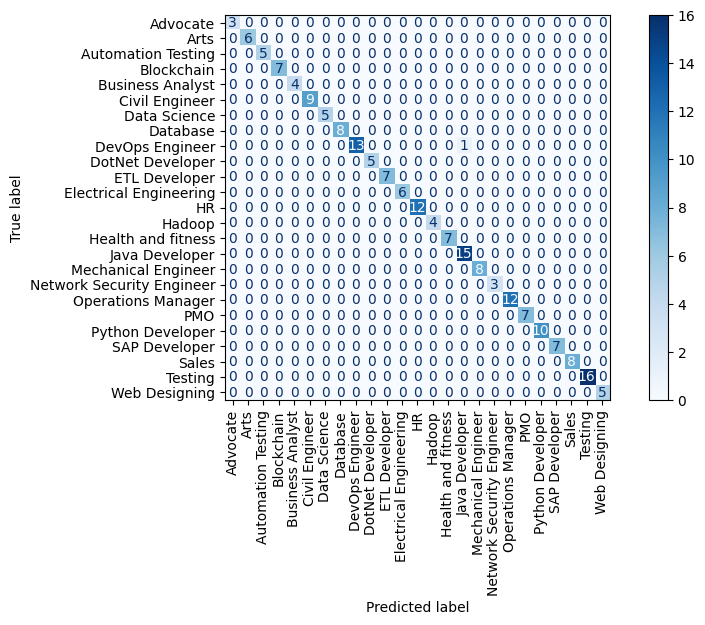

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = [
    "Advocate", "Arts", "Automation Testing", "Blockchain", "Business Analyst",
    "Civil Engineer", "Data Science", "Database", "DevOps Engineer", "DotNet Developer",
    "ETL Developer", "Electrical Engineering", "HR", "Hadoop", "Health and fitness",
    "Java Developer", "Mechanical Engineer", "Network Security Engineer", "Operations Manager",
    "PMO", "Python Developer", "SAP Developer", "Sales", "Testing", "Web Designing"
]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,5))  
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.show()


In [41]:
#pip install numpy pandas scikit-learn imbalanced-learn
